<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_4_9(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÌååÏù¥ÌÜ†ÏπòÎ•º Ïù¥Ïö©Ìïú Î®∏Ïã† Îü¨Îãù

Í∞ÑÎã®Ìïú Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶ò ÌõàÎ†®
  - Ïù∏Í≥µÎâ¥Îü∞
  - ÌçºÏÖâÌä∏Î°†
  - Ï†ÅÏùëÌòï ÏÑ†Ìòï Îâ¥Îü∞, ÌïôÏäµ
   

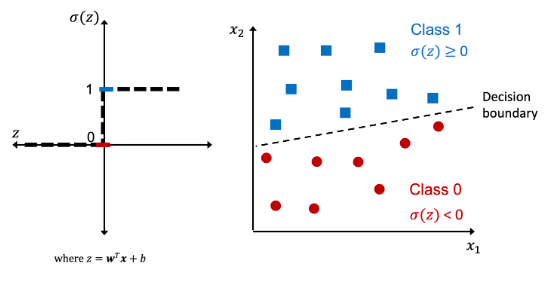

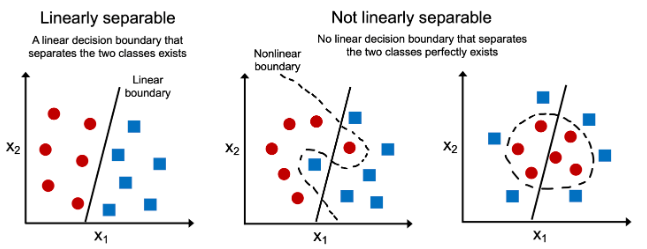

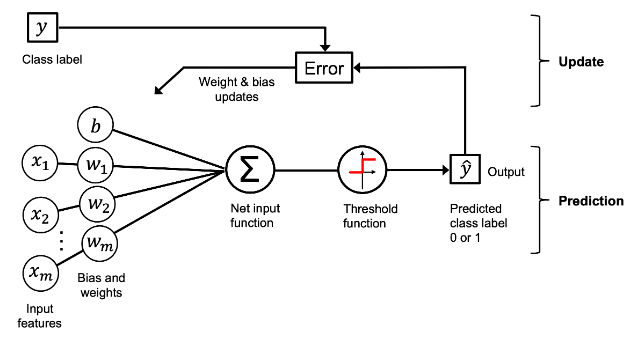

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        # ÌïôÏäµÎ•†(eta)ÏôÄ Î∞òÎ≥µÌöüÏàò(epochs), ÎûúÎç§ ÏãúÎìú(random_state)Î•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        # Í∞ÄÏ§ëÏπòÏôÄ Ï†àÌé∏ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        # ÏóêÌè¨ÌÅ¨ÎßàÎã§ ÌïôÏäµÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # ÏòàÏ∏°Í≥º Ïã§Ï†ú Í∞íÏùò Ï∞®Ïù¥Î•º Ïù¥Ïö©Ìï¥ ÏóÖÎç∞Ïù¥Ìä∏ ÏñëÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§.
                update = self.eta * (target - self.predict(xi))
                # Í∞ÄÏ§ëÏπòÏôÄ Ï†àÌé∏ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
                self.w_ += update * xi
                self.b_ += update
                # Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïòÎ©¥ errorsÎ•º Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.
                errors += int(update != 0.0)
            # Í∞Å ÏóêÌè¨ÌÅ¨ÎßàÎã§ Ïò§Î•ò ÏàòÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§.
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # Ïàú ÏûÖÎ†• Í≥ÑÏÇ∞: Í∞ÄÏ§ëÏπòÏôÄ ÌäπÏÑ±Ïùò ÎÇ¥Ï†ÅÌï© + Ï†àÌé∏
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        # ÏòàÏ∏° Ìï®Ïàò: Ïàú ÏûÖÎ†•Ïù¥ 0 Ïù¥ÏÉÅÏù¥Î©¥ 1, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ 0
        return np.where(self.net_input(X) >= 0.0, 1, 0)


####ÌçºÏÖâÌä∏Î°†(Perceptron)ÏùÄ Ïù∏Í≥µ Ïã†Í≤ΩÎßùÏùò Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù∏ ÌòïÌÉúÎ°ú, 1957ÎÖÑ ÌîÑÎûëÌÅ¨ Î°úÏ††Î∏îÎû´(Frank Rosenblatt)Ïóê ÏùòÌï¥ Ï†úÏïàÎêú Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞ÏûÖÎãàÎã§. ÌçºÏÖâÌä∏Î°†ÏùÄ Ï£ºÏñ¥ÏßÑ ÏûÖÎ†•ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïù¥ÏßÑ Î∂ÑÎ•ò(Îëê Í∞ÄÏßÄ ÌÅ¥ÎûòÏä§ Ï§ë ÌïòÎÇòÎ°ú Î∂ÑÎ•ò)Î•º ÏàòÌñâÌïòÎ©∞, Í∞ÄÏû• Í∞ÑÎã®Ìïú ÌòïÌÉúÏùò Ïã†Í≤ΩÎßù Íµ¨Ï°∞ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÌçºÏÖâÌä∏Î°†Ïùò Í∏∞Î≥∏ Í∞úÎÖêÍ≥º ÎèôÏûë ÏõêÎ¶¨Î•º ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌïòÍ≤†ÏäµÎãàÎã§.

1. ÌçºÏÖâÌä∏Î°†Ïùò Íµ¨Ï°∞
ÌçºÏÖâÌä∏Î°†ÏùÄ Îã®Ïùº Îâ¥Îü∞(ÎÖ∏Îìú)ÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎ©∞, Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏöîÏÜåÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§:

ÏûÖÎ†•Í∞í: ÏûÖÎ†• Î≤°ÌÑ∞
ùëã
=
[
ùë•
1
,
ùë•
2
,
‚Ä¶
,
ùë•
ùëõ
]
X=[x
1
‚Äã
 ,x
2
‚Äã
 ,‚Ä¶,x
n
‚Äã
 ]Îäî Í∞Å ÌäπÏÑ±Í∞íÏúºÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.
Í∞ÄÏ§ëÏπò: Í∞Å ÏûÖÎ†•Í∞íÏóêÎäî Í∞ÄÏ§ëÏπò
ùëä
=
[
ùë§
1
,
ùë§
2
,
‚Ä¶
,
ùë§
ùëõ
]
W=[w
1
‚Äã
 ,w
2
‚Äã
 ,‚Ä¶,w
n
‚Äã
 ]Í∞Ä Î∂ÄÏó¨Îê©ÎãàÎã§. Í∞ÄÏ§ëÏπòÎäî Î™®Îç∏Ïù¥ ÌïôÏäµÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Ï°∞Ï†ïÎêòÎäî Îß§Í∞úÎ≥ÄÏàòÏûÖÎãàÎã§.
Ìé∏Ìñ•(Bias): Ìé∏Ìñ•
ùëè
bÎäî ÏûÖÎ†•Í≥º ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú Î™®Îç∏Ïù¥ Ï∂úÎ†•ÏùÑ Ï°∞Ï†ïÌï† Ïàò ÏûàÎäî Í∞íÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
ÌôúÏÑ±Ìôî Ìï®Ïàò: ÌçºÏÖâÌä∏Î°†ÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî ÌôúÏÑ±Ìôî Ìï®ÏàòÎäî Î≥¥ÌÜµ Îã®ÏàúÌïú Í≥ÑÎã® Ìï®ÏàòÏûÖÎãàÎã§. Ïù¥ Ìï®ÏàòÎäî ÏûÖÎ†•Ïùò Í∞ÄÏ§ëÌï©ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥†, Ïù¥ Í∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÏúºÎ©¥ 1, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ 0ÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
2. ÌçºÏÖâÌä∏Î°†Ïùò ÎèôÏûë ÏõêÎ¶¨
ÌçºÏÖâÌä∏Î°†ÏùÄ Ï£ºÏñ¥ÏßÑ ÏûÖÎ†•Ïóê ÎåÄÌï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú ÏûëÎèôÌï©ÎãàÎã§:

Ïàú ÏûÖÎ†• Í≥ÑÏÇ∞: Í∞Å ÏûÖÎ†• ÌäπÏÑ±Í∞íÏóê Í∞ÄÏ§ëÏπòÎ•º Í≥±Ìïú ÌõÑ Î™®Îëê ÎçîÌïòÍ≥†, Ïó¨Í∏∞Ïóê Ìé∏Ìñ•ÏùÑ ÎçîÌïòÏó¨ Ïàú ÏûÖÎ†•ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§. Ïù¥Î•º ÏàòÏãùÏúºÎ°ú ÌëúÌòÑÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:

net_input
=
ùëã
‚ãÖ
ùëä
+
ùëè
=
‚àë
ùëñ
=
1
ùëõ
ùë§
ùëñ
ùë•
ùëñ
+
ùëè
net_input=X‚ãÖW+b=
i=1
‚àë
n
‚Äã
 w
i
‚Äã
 x
i
‚Äã
 +b
ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö©: Ïàú ÏûÖÎ†•ÏùÑ Í≥ÑÎã® Ìï®ÏàòÏóê ÌÜµÍ≥ºÏãúÏºú ÏµúÏ¢Ö Ï∂úÎ†•ÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§. ÌçºÏÖâÌä∏Î°†Ïùò Ï∂úÎ†•ÏùÄ Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÏóê ÎåÄÌï¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï†ïÏùòÎê©ÎãàÎã§:

output
=
{
1
if¬†net_input
‚â•
0
0
if¬†net_input
<
0
output={
1
0
‚Äã
  
if¬†net_input‚â•0
if¬†net_input<0
‚Äã

ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞í ÎπÑÍµê: Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùÑ ÎπÑÍµêÌïòÏó¨ Ïò§Ï∞®Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏: Ïò§Ï∞®Í∞Ä Î∞úÏÉùÌïú Í≤ΩÏö∞, Í∞ÄÏ§ëÏπòÏôÄ Ìé∏Ìñ•ÏùÑ Îã§Ïùå Í∑úÏπôÏóê Îî∞Îùº ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§:

ùë§
ùëñ
:
=
ùë§
ùëñ
+
ùúÇ
√ó
(
target
‚àí
output
)
√ó
ùë•
ùëñ
w
i
‚Äã
 :=w
i
‚Äã
 +Œ∑√ó(target‚àíoutput)√óx
i
‚Äã


ùëè
:
=
ùëè
+
ùúÇ
√ó
(
target
‚àí
output
)
b:=b+Œ∑√ó(target‚àíoutput)
Ïó¨Í∏∞ÏÑú
ùúÇ
Œ∑Îäî ÌïôÏäµÎ•†Î°ú, Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏Ïùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌï©ÎãàÎã§.

Î∞òÎ≥µ ÌïôÏäµ: Î™®Îì† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïó¨Îü¨ Î≤à(ÏóêÌè¨ÌÅ¨) ÌïôÏäµÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§. ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÎ©¥ÏÑú Î™®Îç∏Ïù¥ Ï†êÏ†ê Îçî Ï†ïÌôïÌïòÍ≤å Îç∞Ïù¥ÌÑ∞ Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌïòÍ≤å Îê©ÎãàÎã§.

3. ÌçºÏÖâÌä∏Î°†Ïùò ÌïúÍ≥Ñ
ÌçºÏÖâÌä∏Î°†ÏùÄ Îã®ÏàúÌïòÍ≥† Ìö®Ïú®Ï†ÅÏù∏ Î™®Îç∏Ïù¥ÏßÄÎßå, Îã§ÏùåÍ≥º Í∞ôÏùÄ ÌïúÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§:

ÏÑ†Ìòï Î∂ÑÎ¶¨ Í∞ÄÎä•ÏÑ±: ÌçºÏÖâÌä∏Î°†ÏùÄ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Î∂ÑÎ¶¨ Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎßå ÏôÑÎ≤ΩÌïòÍ≤å ÏûëÎèôÌï©ÎãàÎã§. Ï¶â, Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßÅÏÑ†ÏúºÎ°ú ÎÇòÎàå Ïàò ÏóÜÎäî Í≤ΩÏö∞(Ïòà: XOR Î¨∏Ï†ú) ÌçºÏÖâÌä∏Î°†ÏùÄ Ï†ÅÏ†àÌïú Î∂ÑÎ•òÎ•º ÌïòÏßÄ Î™ªÌï©ÎãàÎã§.
Î≥µÏû°Ìïú Î¨∏Ï†ú Ìï¥Í≤∞: Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†(MLP)Í≥º Í∞ôÏùÄ Ïã†Í≤ΩÎßùÏù¥ ÎÇòÏò§Í∏∞ Ï†ÑÍπåÏßÄÎäî ÌçºÏÖâÌä∏Î°†Ïù¥ Î≥µÏû°Ìïú ÎπÑÏÑ†Ìòï Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎäî Îç∞ ÌïúÍ≥ÑÍ∞Ä ÏûàÏóàÏäµÎãàÎã§.
4. ÌçºÏÖâÌä∏Î°†Ïùò Ïó≠ÏÇ¨Ï†Å Ï§ëÏöîÏÑ±
ÌçºÏÖâÌä∏Î°†ÏùÄ ÌòÑÎåÄ Ïù∏Í≥µ Ïã†Í≤ΩÎßùÏùò Í∏∞Ï¥àÎ•º Ïù¥Î£®Îäî Î™®Îç∏Î°ú, Ïã†Í≤ΩÎßù Î∞è Î®∏Ïã†Îü¨Îãù Ïó∞Íµ¨Ïùò ÏãúÏûëÏùÑ ÏïåÎ¶∞ Ï§ëÏöîÌïú Î™®Îç∏ÏûÖÎãàÎã§. Ïù¥ÌõÑ Î∞úÏ†ÑÎêú Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†(MLP)Í≥º Í∞ôÏùÄ Î™®Îç∏Îì§ÏùÄ ÌçºÏÖâÌä∏Î°†Ïùò Í∏∞Î≥∏ Í∞úÎÖêÏùÑ ÌôïÏû•ÌïòÏó¨ ÎπÑÏÑ†Ìòï Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÍ≤å ÌñàÏäµÎãàÎã§.

5. ÏΩîÎìú ÏòàÏãú
ÏúÑÏóêÏÑú ÏÑ§Î™ÖÌïú Perceptron ÌÅ¥ÎûòÏä§Î•º ÌÜµÌï¥ ÌçºÏÖâÌä∏Î°†ÏùÑ Íµ¨ÌòÑÌï† Ïàò ÏûàÏúºÎ©∞, Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏãúÌÇ§Í≥† ÌèâÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Í∞ÑÎã®Ìïú Î™®Îç∏ÏùÄ Ïò§ÎäòÎÇ†ÏóêÎèÑ Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú Í∞ÄÎ≥çÍ≥† Îπ†Î•∏ Ìï¥Í≤∞Ï±ÖÏúºÎ°ú ÏÇ¨Ïö©Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
# ÎëêÍ∞úÏùò Î≤°ÌÑ∞ÏÇ¨Ïù¥Ïùò Í∞ÅÎèÑÎ•º Í≥ÑÏÇ∞ - ÏΩîÏÇ¨Ïù∏ Î≤ïÏπô
v1 = np.array([1,2,3])
v2 = 0.5 * v1
# Î≤°ÌÑ∞Ïùò ÎÇ¥Ï†Å
print(np.dot(v1,v2))
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

7.0


0.0

In [ ]:
# Î≤°ÌÑ∞Ïùò ÎÖ∏Î¶Ñ(ÌÅ¨Í∏∞)Í≥ÑÏÇ∞
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

3.7416573867739413
1.8708286933869707


In [ ]:
# iris data Î°ú Î∂ÑÎ•ò ÌõàÎ†®
!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
X.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [ ]:
y.head() # ÌíàÏ¢Ö

class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa

In [ ]:
y.value_counts()

class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

ÏÇ∞Ï†êÎèÑ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌè¨ Í∑∏Î¶¨Í∏∞

In [ ]:
# df = X
# df['species'] = y
# df.head()

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

<Axes: xlabel='sepal length', ylabel='sepal width'>

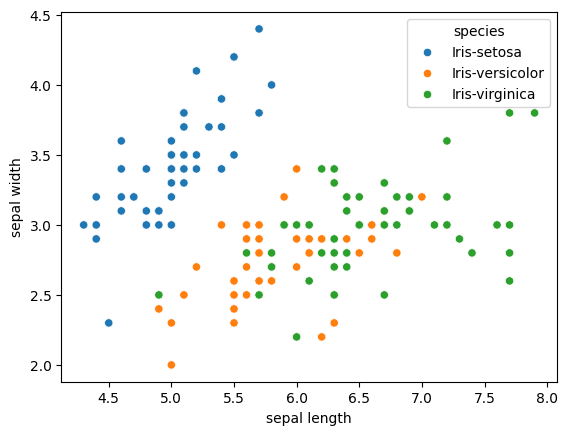

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'sepal length', y = 'sepal width', hue = 'species', data = df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['species'] = le.fit_transform(df['species'])
# df.head()

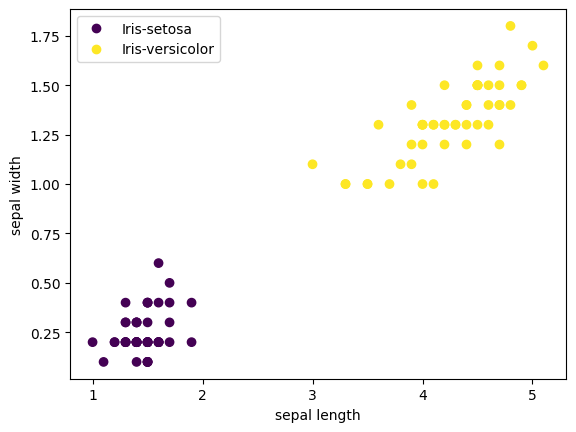

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# dfÎäî XÏôÄ yÍ∞Ä Í≤∞Ìï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥Î©∞, 'Iris-virginica'Î•º Ï†úÏô∏
df = pd.concat([X, y], axis=1)
df = df[df['class'] != 'Iris-virginica']

# ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÉâÍπîÎ°ú ÌëúÌòÑ
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])

# ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
scatter = plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=df['class_encoded'], cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

# Î≤îÎ°Ä Ï∂îÍ∞Ä (ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏúºÎ°ú)
handles, _ = scatter.legend_elements()
class_labels = le.classes_
plt.legend(handles, class_labels)
plt.show()

In [ ]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

ÌçºÏÖâÌä∏Î°† Î™®Îç∏ ÌõàÎ†®

In [ ]:
y['class'] = le.fit_transform(y['class'])
model = Perceptron(eta = 0.1, epochs = 10)
model.fit(X.iloc[:, 2:3].values, y.values)

<ipython-input-70-077e2c972afd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = le.fit_transform(y['class'])
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
model.errors_

[52, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [ ]:
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏö©Í≥º ÌÖåÏä§Ìä∏Ïö©ÏúºÎ°ú Î∂ÑÌï† (80% ÌïôÏäµ, 20% ÌÖåÏä§Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 2:3].values, y.values, test_size=0.2, random_state=1)

# Î™®Îç∏ ÌõàÎ†®
model = Perceptron(eta=0.1, epochs=10)
model.fit(X_train, y_train)


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 43.33%
Confusion Matrix:
[[ 0 11  0]
 [ 0 13  0]
 [ 0  6  0]]


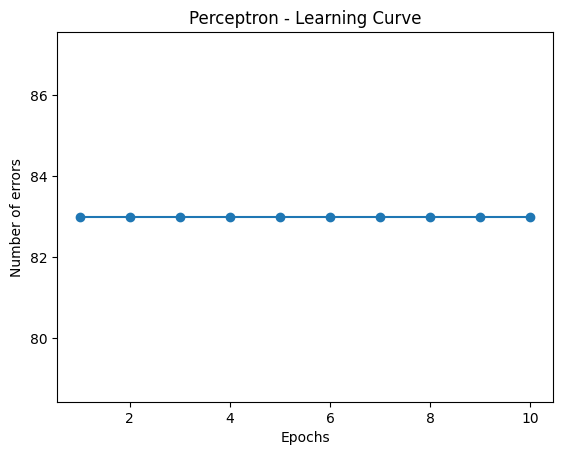

In [ ]:
import matplotlib.pyplot as plt

# ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑúÏùò Ïò§Î•ò Ïàò ÏãúÍ∞ÅÌôî
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Learning Curve')
plt.show()


In [ ]:
# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° (Ïòà: sepal length 3.5Ïù∏ Í≤ΩÏö∞)
new_data = np.array([[3.5]])
prediction = model.predict(new_data)
print(f'Prediction for new data [3.5]: {prediction}')


Prediction for new data [3.5]: [1]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌïôÏäµÏö©Í≥º ÌÖåÏä§Ìä∏Ïö©)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 2:3].values, y.values, test_size=0.2, random_state=1)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÎì§Ïùò Î™©Î°ù
etas = [0.001, 0.01, 0.1, 1.0]
epochs_list = [10, 50, 100]
best_accuracy = 0
best_params = {}

# Ïó¨Îü¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©Ïóê ÎåÄÌï¥ Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
for eta in etas:
    for epochs in epochs_list:
        model = Perceptron(eta=eta, epochs=epochs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Eta: {eta}, Epochs: {epochs}, Accuracy: {accuracy * 100:.2f}%")

        # ÏµúÍ≥† ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Îäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ Ï†ÄÏû•
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'eta': eta, 'epochs': epochs}

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© Ï∂úÎ†•
print(f"\nBest Hyperparameters: Eta: {best_params['eta']}, Epochs: {best_params['epochs']}, Accuracy: {best_accuracy * 100:.2f}%")


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.001, Epochs: 10, Accuracy: 43.33%
Eta: 0.001, Epochs: 50, Accuracy: 43.33%
Eta: 0.001, Epochs: 100, Accuracy: 43.33%
Eta: 0.01, Epochs: 10, Accuracy: 43.33%
Eta: 0.01, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.01, Epochs: 100, Accuracy: 43.33%
Eta: 0.1, Epochs: 10, Accuracy: 43.33%
Eta: 0.1, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.1, Epochs: 100, Accuracy: 43.33%
Eta: 1.0, Epochs: 10, Accuracy: 43.33%
Eta: 1.0, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 1.0, Epochs: 100, Accuracy: 43.33%

Best Hyperparameters: Eta: 0.001, Epochs: 10, Accuracy: 43.33%


In [ ]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
final_model = Perceptron(eta=best_params['eta'], epochs=best_params['epochs'])
final_model.fit(X_train, y_train)

# ÏµúÏ¢Ö Î™®Îç∏Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Final Model Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
final_model = Perceptron(eta=best_params['eta'], epochs=best_params['epochs'])
final_model.fit(X_train, y_train)

# ÏµúÏ¢Ö Î™®Îç∏Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Final Model Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌïôÏäµÏö©Í≥º ÌÖåÏä§Ìä∏Ïö©)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 2:3].values, y.values, test_size=0.2, random_state=1)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÎì§Ïùò Î™©Î°ù
etas = [0.001, 0.01, 0.1, 1.0]
epochs_list = [10, 50, 100]
best_accuracy = 0
best_params = {}

# Ïó¨Îü¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©Ïóê ÎåÄÌï¥ Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
for eta in etas:
    for epochs in epochs_list:
        model = Perceptron(eta=eta, epochs=epochs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Eta: {eta}, Epochs: {epochs}, Accuracy: {accuracy * 100:.2f}%")

        # ÏµúÍ≥† ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Îäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ Ï†ÄÏû•
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'eta': eta, 'epochs': epochs}

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© Ï∂úÎ†•
print(f"\nBest Hyperparameters: Eta: {best_params['eta']}, Epochs: {best_params['epochs']}, Accuracy: {best_accuracy * 100:.2f}%")


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.001, Epochs: 10, Accuracy: 43.33%
Eta: 0.001, Epochs: 50, Accuracy: 43.33%
Eta: 0.001, Epochs: 100, Accuracy: 43.33%
Eta: 0.01, Epochs: 10, Accuracy: 43.33%
Eta: 0.01, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.01, Epochs: 100, Accuracy: 43.33%
Eta: 0.1, Epochs: 10, Accuracy: 43.33%
Eta: 0.1, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.1, Epochs: 100, Accuracy: 43.33%
Eta: 1.0, Epochs: 10, Accuracy: 43.33%
Eta: 1.0, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 1.0, Epochs: 100, Accuracy: 43.33%

Best Hyperparameters: Eta: 0.001, Epochs: 10, Accuracy: 43.33%


In [ ]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
final_model = Perceptron(eta=best_params['eta'], epochs=best_params['epochs'])
final_model.fit(X_train, y_train)

# ÏµúÏ¢Ö Î™®Îç∏Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Final Model Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
import joblib

# Î™®Îç∏ Ï†ÄÏû•
joblib.dump(final_model, 'perceptron_model.pkl')

# Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎìú
loaded_model = joblib.load('perceptron_model.pkl')

# Î°úÎìúÌïú Î™®Îç∏Î°ú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
new_data = np.array([[3.5]])
prediction = loaded_model.predict(new_data)
print(f'Prediction for new data [3.5]: {prediction}')


Prediction for new data [3.5]: [1]


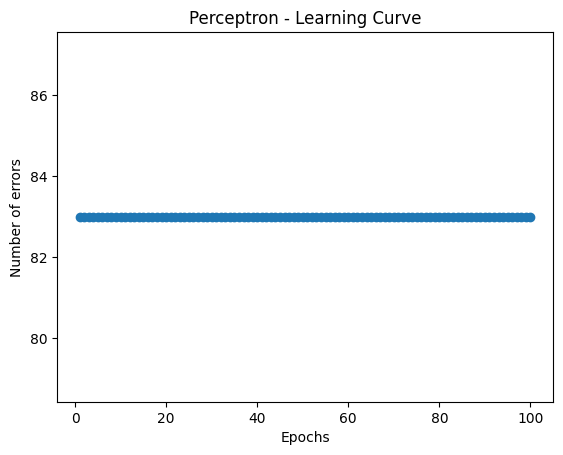

In [ ]:
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Learning Curve')
plt.show()

In [ ]:
import pickle

# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞
data = {'key': 'value', 'another_key': [1, 2, 3]}

# Í∞ùÏ≤¥Î•º pkl ÌååÏùºÎ°ú Ï†ÄÏû•
with open('example.pkl', 'wb') as f:
    pickle.dump(data, f)

# pkl ÌååÏùºÏóêÏÑú Í∞ùÏ≤¥Î•º Î∂àÎü¨Ïò§Í∏∞
with open('example.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data)


{'key': 'value', 'another_key': [1, 2, 3]}


In [ ]:
import joblib

# 'perceptron_model.pkl' ÌååÏùºÏùÑ joblibÏùÑ ÌÜµÌï¥ Î∂àÎü¨Ïò§Í∏∞
loaded_model = joblib.load('/content/perceptron_model.pkl')

# Î∂àÎü¨Ïò® Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ
new_data = np.array([[3.5]])
prediction = loaded_model.predict(new_data)
print(f'Prediction for new data [3.5]: {prediction}')


Prediction for new data [3.5]: [1]


  - ÏûëÍ≥† Îã®ÏàúÌïú Í∞ùÏ≤¥ÎÇò ÌäπÎ≥ÑÌûà ÏµúÏ†ÅÌôîÍ∞Ä ÌïÑÏöîÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ÏóêÎäî pickleÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÖÎãàÎã§.
  - ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÎÇò Îπ†Î•∏ ÏßÅÎ†¨Ìôî/Ïó≠ÏßÅÎ†¨ÌôîÍ∞Ä ÌïÑÏöîÌïú Í≤ΩÏö∞, ÌäπÌûà Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï† ÎïåÎäî joblibÏù¥ Îçî Ï†ÅÌï©Ìï©ÎãàÎã§.

<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


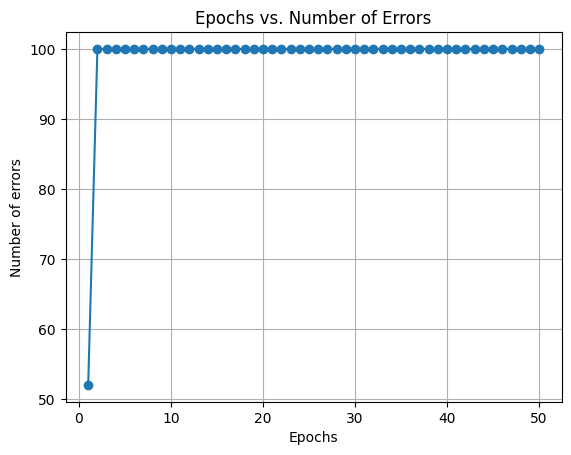

In [ ]:
import matplotlib.pyplot as plt
model = Perceptron(eta = 0.01, epochs = 50)
model.fit(X.iloc[:, 2:3].values, y.values)

# ÏóêÌè¨ÌÅ¨ ÏàòÏóê Îî∞Î•∏ Ïò§Î•ò Ïàò Í∑∏ÎûòÌîÑ
epochs = range(1, len(model.errors_) + 1)  # ÏóêÌè¨ÌÅ¨Îäî 1Î∂ÄÌÑ∞ ÏãúÏûë
errors = model.errors_  # Í∞Å ÏóêÌè¨ÌÅ¨ÏóêÏÑú Î∞úÏÉùÌïú Ïò§Î•ò Ïàò

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.plot(epochs, errors, marker='o')
plt.xlabel('Epochs')  # xÏ∂ï Î†àÏù¥Î∏î
plt.ylabel('Number of errors')  # yÏ∂ï Î†àÏù¥Î∏î
plt.title('Epochs vs. Number of Errors')  # Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.grid(True)  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.show()  # Í∑∏ÎûòÌîÑ ÌëúÏãú
